ZADATAK 1. Implementirati hash tabelu korištenjem ulančanog hashiranja pomoću lista (primjer slika)

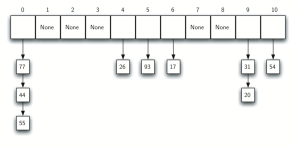

In [3]:
"""
prvo radimo incijalizaciju hash tabele koja se sastoji od više ugnježđenih lista
Hash tabela kao lista listi: 
[[], [], [], [], [], [], [], [], [], []]
"""
hash_table = [[] for _ in range(11)]
print (hash_table)



[[], [], [], [], [], [], [], [], [], [], []]


In [4]:
"""
Funkcija za implementaciju Hash funkcije
"""
def hashing_func(key):
    return key % len(hash_table)

In [9]:
"""
Funkcija za ubacivanje key, value para

"""

def insert(hash_table, key, value):
    hash_key = hash(key) % len(hash_table)
    
    key_exists = False
    bucket = hash_table[hash_key]    
    for i, kv in enumerate(bucket):
        k, v = kv
        if key == k:
            key_exists = True 
            break
    if key_exists:
        bucket[i] = ((key, value))
    else:
        bucket.append((key, value))

In [10]:
insert(hash_table, 10, 'Nepal')
insert(hash_table, 25, 'USA')
insert(hash_table, 20, 'India')
insert(hash_table, 44, 'Croatia')
insert(hash_table, 88, 'Slovenia')
insert(hash_table, 36, 'Slovakia')
print (hash_table)


[[(44, 'Croatia'), (88, 'Slovenia')], [], [], [(25, 'USA'), (36, 'Slovakia')], [], [], [], [], [], [(20, 'India')], [(10, 'Nepal')]]


In [11]:
"""
funkcija za prteraživanje

"""

def search(hash_table, key):
    hash_key = hash(key) % len(hash_table)    
   
    bucket = hash_table[hash_key]
    
    for i, kv in enumerate(bucket):
        k, v = kv
        if key == k:
            return v
 


In [59]:
print (search(hash_table, 10))  
print (search(hash_table, 25))  
print (search(hash_table, 36))  

Nepal
USA
Slovakia


In [13]:
"""
Funkcija za brisanje iz Hash tabele

"""

def delete(hash_table, key):
    hash_key = hash(key) % len(hash_table)  
    
    key_exists = False
    bucket = hash_table[hash_key]
    for i, kv in enumerate(bucket):
        k, v = kv 
        if key == k:
            key_exists = True 
            break
    if key_exists:
        del bucket[i]
        print ('Key {} je obrisan'.format(key))
    else:
        print ('Key {} nijed pronađen'.format(key))

In [14]:
delete(hash_table, 100)
print (hash_table)
 
delete(hash_table, 10)
print (hash_table)

Key 100 nijed pronađen
[[(44, 'Croatia'), (88, 'Slovenia')], [], [], [(25, 'USA'), (36, 'Slovakia')], [], [], [], [], [], [(20, 'India')], [(10, 'Nepal')]]
Key 10 je obrisan
[[(44, 'Croatia'), (88, 'Slovenia')], [], [], [(25, 'USA'), (36, 'Slovakia')], [], [], [], [], [], [(20, 'India')], []]


ZADATAK 2

Linear (sekvencijalno) pretraživanje  rekurzivno

za zadani index vrati value ili false , provjera indeks ne smije biti veći od duljine polja - 1
za zadanu vrijednost vrati indeks ili false ako ga nema

In [17]:
def LinSearch( arr, left, right, indeks): 
    if right < left: 
        return -1
    if arr[left] == indeks: 
        return left 
    if arr[right] == indeks: 
        return right 
    return LinSearch(arr, left+1, right-1, indeks) 
  
# Driver Code  
arr = [12, 34, 54, 2, 3, 34, 23, 12, 78, 56, 89] 
n = len(arr) 
zadani_element = 89
vraceni_indeks = LinSearch(arr, 0, n-1, zadani_element) 
if vraceni_indeks != -1: 
    print ("Element", zadani_element,"je prisutan na indeksu %d" %(vraceni_indeks)) 
else: 
    print ("Element %d nije u listi" %(zadani_element) )

Element 89 je prisutan na indeksu 10


ZADATAK 3.

Klasa i funkcije za hashiranje u hash tabelu primjenom Linearnog isprobavanja




In [ ]:
class HashTabelaLinProbe:
    def __init__(self, capacity):
        self.capacity = capacity
        self.slots = [None] * self.capacity
        self.count = 0

    def __str__(self):
        return str(self.slots)

    def __contains__(self, item):
        return self.search(item) != -1

    def __len__(self):
        return self.count

    def hash_function(self, key):
        #return hash(key) % self.capacity
        return 3*key % self.capacity
    
    def find_slot(self, key):
        slot = self.hash_function(key)
        while self.slots[slot] is not None and self.slots[slot] != key:
            slot = (slot + 1) % self.capacity
            # infinite loop if no slots available
        return slot

    def insert(self, key):
        slot = self.find_slot(key)
        if self.slots[slot] != key:
            self.slots[slot] = key
            self.count += 1

     

In [ ]:
from random import randint

m = HashTabelaLinProbe(13)
keys = [2341, 4234, 2839, 430, 22, 397, 3920, 4567, 2833,44]
n = len(keys)
for i in keys:
    m.insert(i)
print(m)

#[None, 4234, 2839, 2341, 430, 22, 44, None, 397, 3920, 2833, None, 4567]